# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
print(tf.__version__)

2.2.0


In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()

  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()

  from sklearn.metrics import confusion_matrix
  import itertools
  cm = confusion_matrix(y_test, y_pred)

  plt.figure(figsize=(10,10))
  plt.imshow(cm, cmap=plt.cm.Blues)
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], 'd'),
            horizontalalignment = 'center',
            color='black')
  plt.xlabel("Predicted labels")
  plt.ylabel("True labels")
  plt.xticks(range(0,classes))
  plt.yticks(range(0,classes))
  plt.title('Confusion matrix')
  plt.colorbar()
  plt.show()

In [0]:
# Taken from https://www.cs.toronto.edu/~kriz/cifar.html
labels = "airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck".split(",")

## As a rule of thumb

Remember that the pooling operation decreases the size of the image, and we lose information.

However, the number of features generally increases and we get more features extracted from the images.

The choices of hyperparams bother us sometimes, because DL has a lot of trial and error involved, we can choose the 

- learning rate

- number of layers

- number of neurons per layer 

- feature size 

- feature number 

- pooling size 

- stride 

On a side note, if you use strided convolution layers, they will decrease the size of the image as well


If we have images with different sizes as inputs; for example; H1 x W1 x 3 and H2 x W2 x 3, then the output will be flatten-ed to different sizes, this won't work for DENSE layers as they do not have change-able input sizes, so we use global max pooling to make a vector of size 1 x 1 x (#_Of_Feature_Maps_)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [38]:
X_train, X_test = X_train / 255.0 , X_test / 255.0 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [39]:
y_train, y_test = y_train.flatten(), y_test.flatten() 
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


In [40]:
classes = len(set(y_train))
print(classes)

10


In [0]:
input_shape = X_train[0].shape

In [0]:
i_layer = Input(shape = input_shape)
h_layer = Conv2D(32, (3,3),activation='relu', padding='same')(i_layer)
h_layer = BatchNormalization()(h_layer)
h_layer = Conv2D(64, (3,3), activation='relu', padding='same')(h_layer)
h_layer = BatchNormalization()(h_layer)
h_layer = Conv2D(128, (3,3), activation='relu', padding='same')(h_layer)
h_layer = BatchNormalization()(h_layer)
h_layer = MaxPooling2D((2,2))(h_layer)
h_layer = Conv2D(128, (3,3), activation='relu', padding='same')(h_layer)
h_layer = BatchNormalization()(h_layer)
h_layer = MaxPooling2D((2,2))(h_layer)
h_layer = Flatten()(h_layer)
h_layer = Dropout(0.5)(h_layer)
h_layer = Dense(512, activation='relu')(h_layer)
h_layer = Dropout(0.5)(h_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)


In [51]:
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4014 - accuracy: 0.8681 - val_loss: 0.3888 - val_accuracy: 0.8753
Epoch 2/50
1354/1563 [========================>.....] - ETA: 1s - loss: 0.3561 - accuracy: 0.8822

KeyboardInterrupt: ignored

In [0]:
y_pred = model.predict(X_test).argmax(axis=1) 
# only for sparse categorical crossentropy

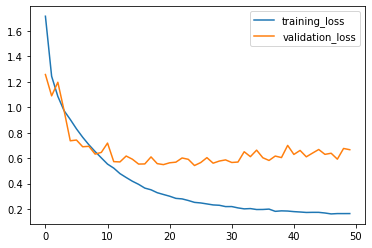

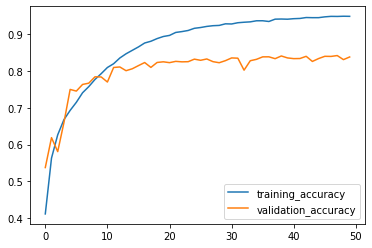

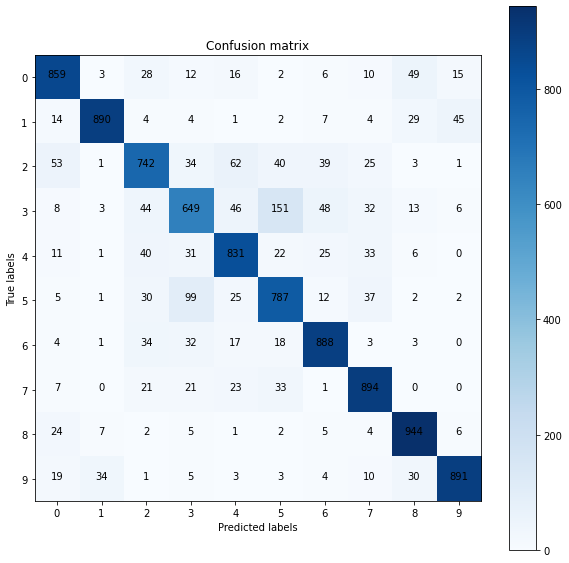

In [17]:
evaluation_tf(report, y_test, y_pred, classes)

total Mishits = 1715


Text(0.5, 1.0, 'Predicted = ship, Real = airplane')

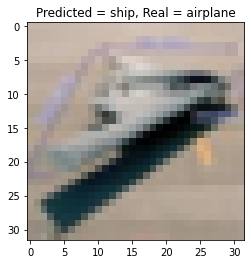

In [50]:
misshits = np.where(y_pred!=y_test)[0]
print("total Mishits = " + str(len(misshits)))
index = np.random.choice(misshits)
plt.imshow(X_test[index])
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))

## LET'S ADD SOME DATA AUGMENTATION FROM KERAS 

taken from https://keras.io/api/preprocessing/image/

In [0]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, 
                                                                 height_shift_range = 0.1, 
                                                                 horizontal_flip=True)


In [57]:
model_dg = Model(i_layer, o_layer)
model_dg.compile(optimizer='adam', 
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
train_data_generator = data_generator.flow(X_train, y_train, batch_size)
spe = X_train.shape[0] // batch_size

report = model_dg.fit_generator(train_data_generator, validation_data=(X_test, y_test), steps_per_epoch=spe, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3662 - accuracy: 0.8841 - val_loss: 0.3942 - val_accuracy: 0.8808
Epoch 2/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3575 - accuracy: 0.8838 - val_loss: 0.4664 - val_accuracy: 0.8674
Epoch 3/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3647 - accuracy: 0.8821 - val_loss: 0.4152 - val_accuracy: 0.8667
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3581 - accuracy: 0.8831 - val_loss: 0.4398 - val_accuracy: 0.8765
Epoch 5/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3571 - accuracy: 0.8836 - val_loss: 0.4192 - val_accuracy: 0.8642
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.3556 - accuracy: 0.8843 - val_loss: 0.4226 - val_accuracy: 0.8768
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3532 - accuracy: 0.8846 - val_loss: 0.3996 -

In [0]:
y_pred = model.predict(X_test).argmax(axis=1) 
# only for sparse categorical crossentropy

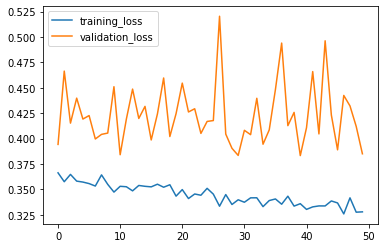

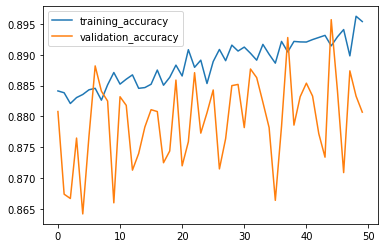

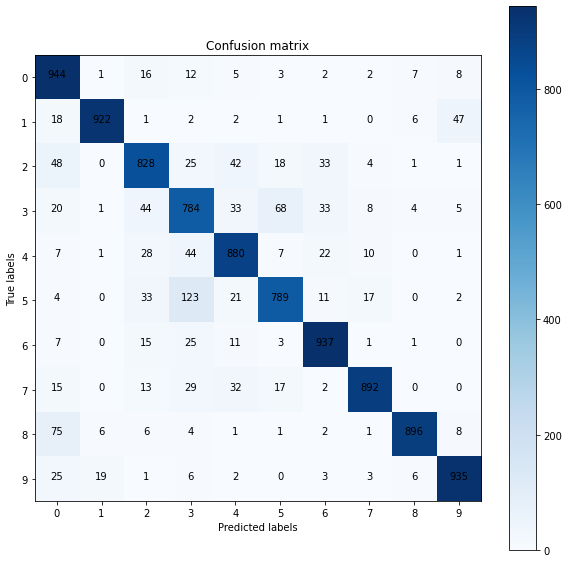

In [59]:
evaluation_tf(report, y_test, y_pred, classes)

total Mishits = 1193


Text(0.5, 1.0, 'Predicted = bird, Real = cat')

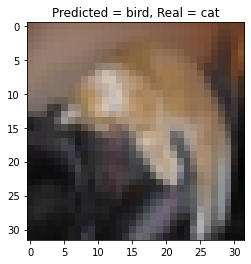

In [60]:
misshits = np.where(y_pred!=y_test)[0]
print("total Mishits = " + str(len(misshits)))
index = np.random.choice(misshits)
plt.imshow(X_test[index])
plt.title("Predicted = " + str(labels[y_pred[index]]) + ", Real = " + str(labels[y_test[index]]))